In [1]:
%%capture
%run '01_Getting_Data.ipynb'

In [2]:
from matplotlib.ticker import MultipleLocator

In [3]:
woo = pandas.DataFrame(index=data.index, columns=['bpi_log'])
woo.bpi_log = numpy.log(data.bitcoin_price)

google = pandas.read_csv("../data/btc_usd_google_trends.csv", ";")

#transform data
google['date'] = pandas.to_datetime(google['date'], format="%d.%m.%y")
google['search_volume_btc_usd'] = google['search_volume_btc_usd'].str.replace(',','.')
google['search_volume_btc_usd'] = google['search_volume_btc_usd'].apply(pandas.to_numeric)
google.set_index('date', inplace=True)

google['search_volume_log'] = numpy.nan
google.search_volume_log = numpy.log(google.search_volume_btc_usd)

woo = woo.join(google.search_volume_log)
woo.fillna(method='ffill', inplace=True)

/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


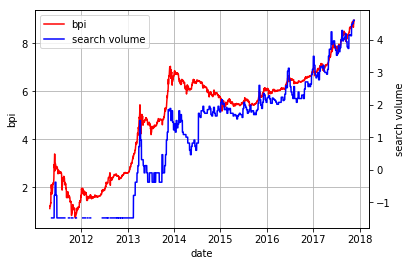

In [4]:
#plot data
#fig = matplotlib.pyplot.figure(num=None, figsize=(24, 5), dpi=200, facecolor='w', edgecolor='k')

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(woo.index, woo.bpi_log, label = 'bpi', color ='r')
ax2 = ax.twinx()
lns2 = ax2.plot(woo.index, woo.search_volume_log, label = 'search volume', color = 'b')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel('bpi')
ax2.set_ylabel('search volume')

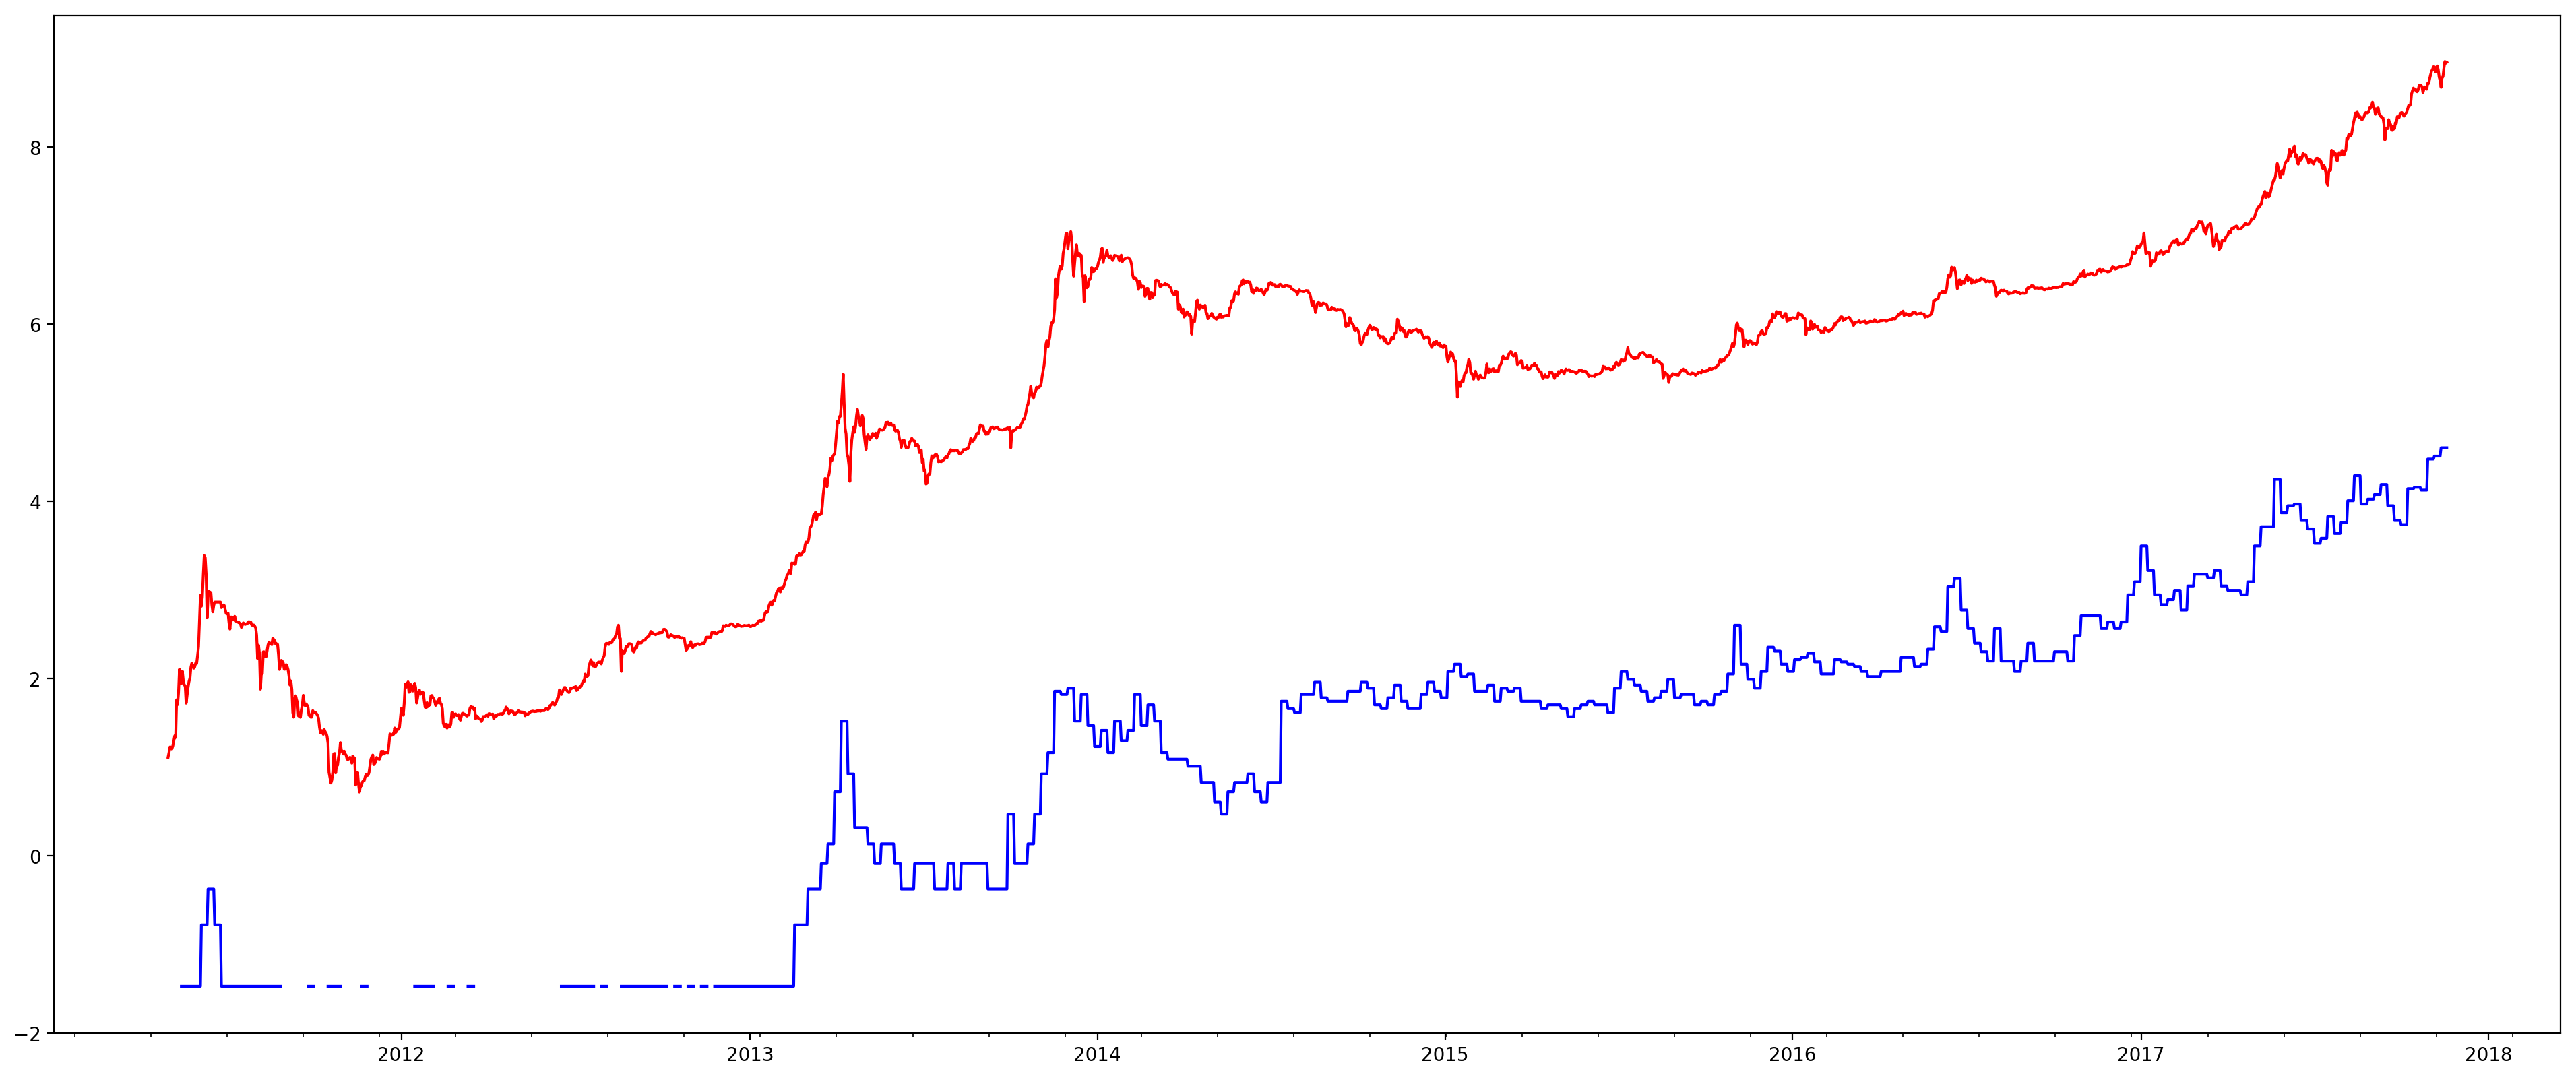

In [5]:
#plot data
fig = matplotlib.pyplot.figure(num=None, figsize=(24, 10), dpi=200, facecolor='w', edgecolor='k')

#fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)

ml = MultipleLocator(80)
ax.xaxis.set_minor_locator(ml)
#ax.xaxis.grid(which="minor", color='grey', linestyle='-', linewidth=0.7)

ax.plot(woo.index, woo.bpi_log, label = 'bpi', color ='r')
ax.plot(woo.index, woo.search_volume_log, label = 'bpi', color ='b')

#ax.plot([4, 4], [4, 4], 'black')

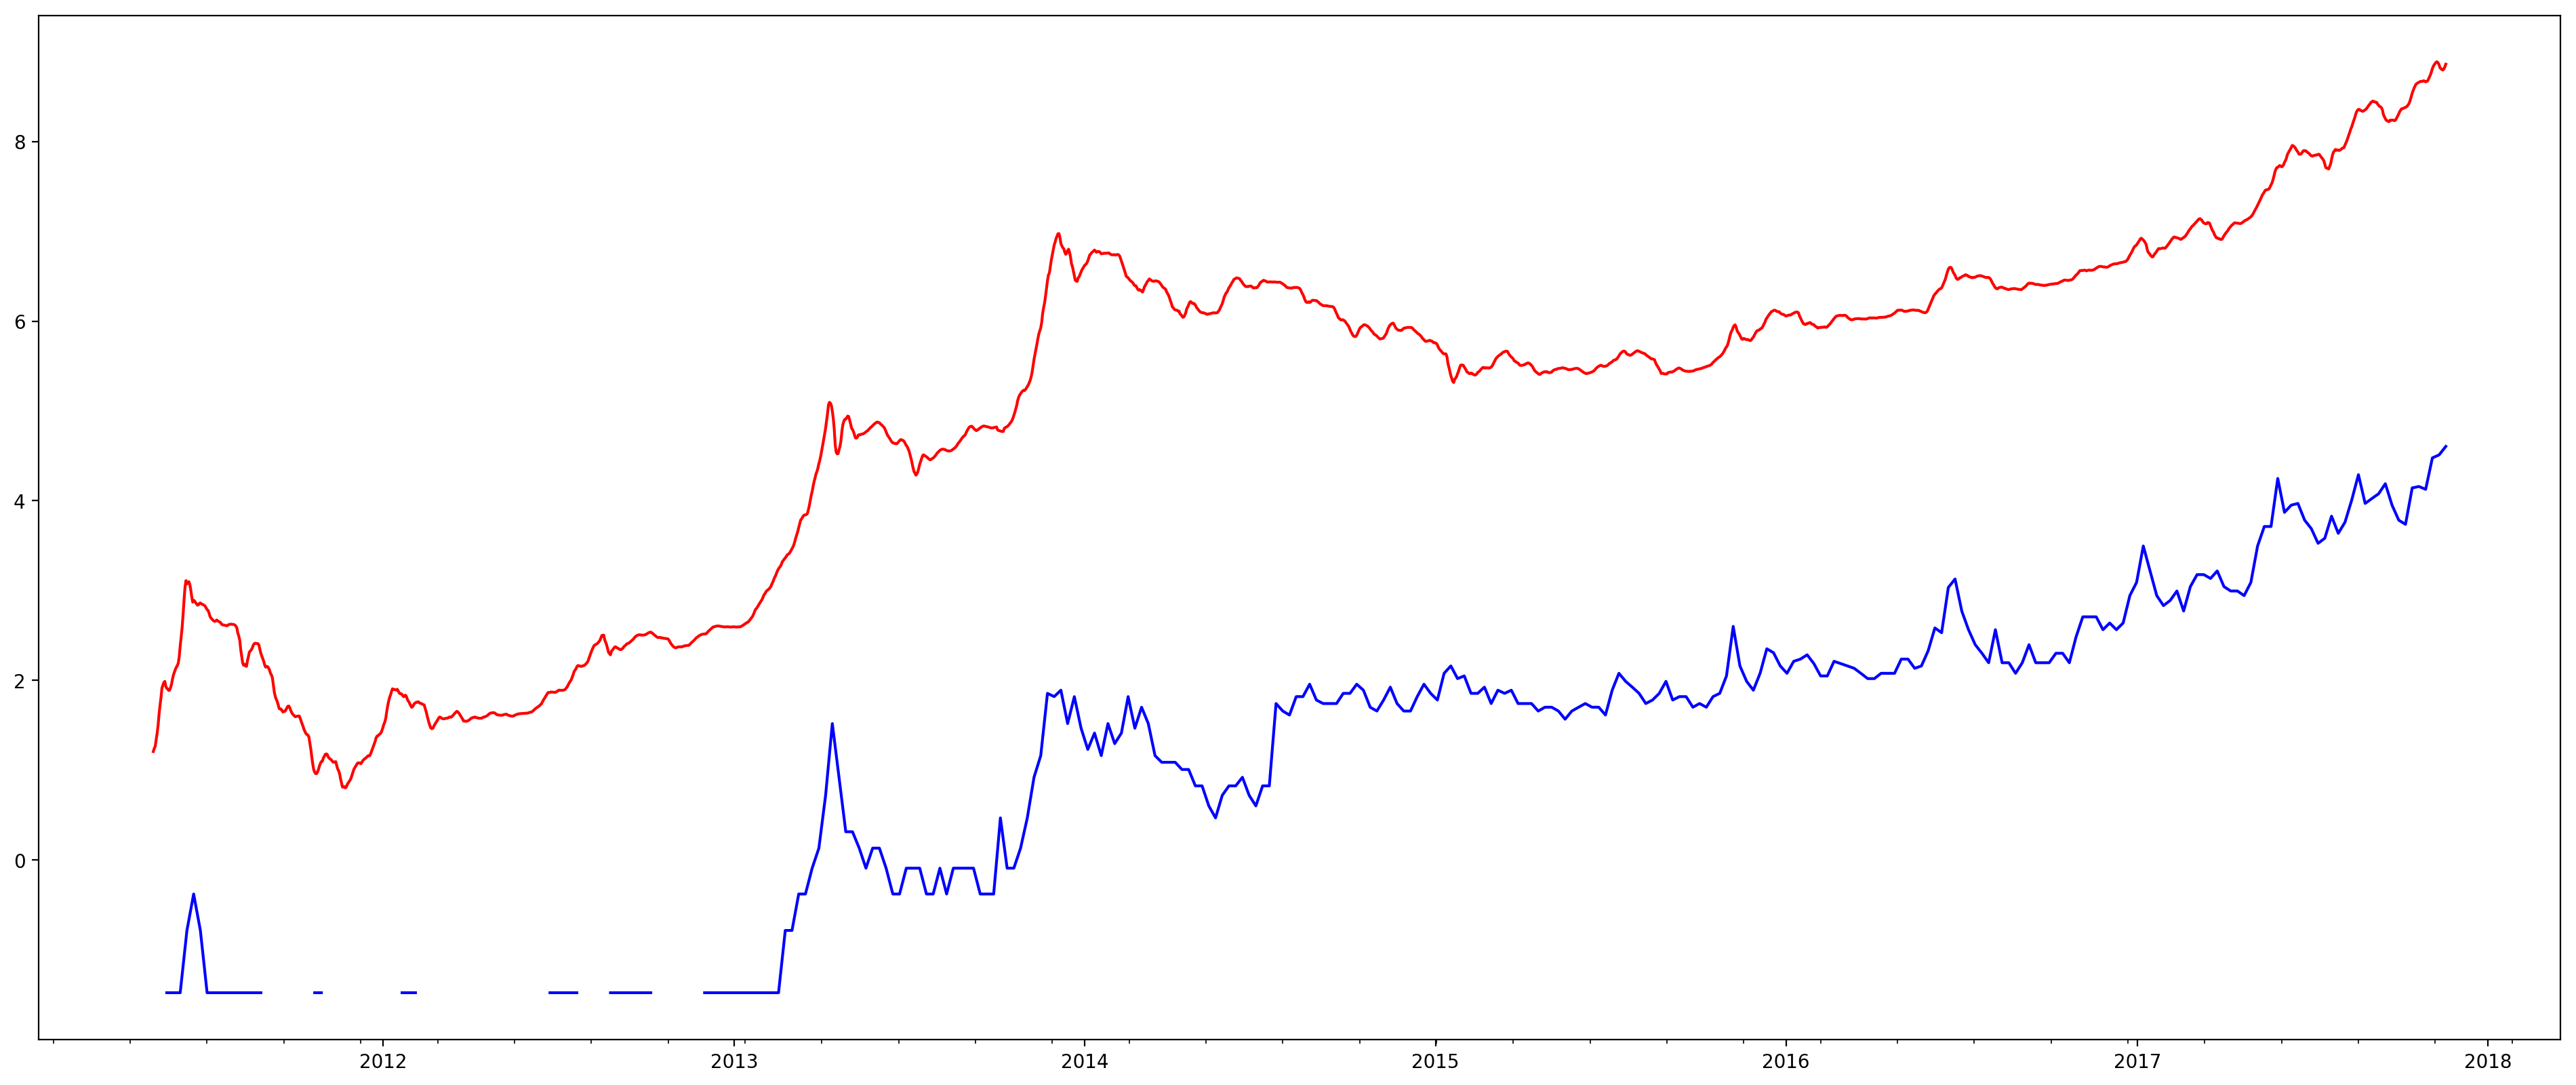

In [6]:
woo_mean = woo.rolling(window=7,center=False).mean()

#plot data
fig = matplotlib.pyplot.figure(num=None, figsize=(24, 10), dpi=200, facecolor='w', edgecolor='k')

#fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)

ml = MultipleLocator(80)
ax.xaxis.set_minor_locator(ml)
#ax.xaxis.grid(which="minor", color='grey', linestyle='-', linewidth=0.7)

ax.plot(woo_mean.index, woo_mean.bpi_log, label = 'bpi', color ='r')
ax.plot(woo_mean.index, woo_mean.search_volume_log, label = 'bpi', color ='b')

#ax.plot([4, 4], [4, 4], 'black')